In [22]:
import pandas as pd

In [23]:
df = pd.read_csv('../data/processed/df_listo_para_segmentar.csv',sep=';')
df

,CUT Comuna Origen,Comuna Origen,CUT Provincia Origen,Provincia Origen,CUT Region Origen,Region Origen,CUT Comuna Destino,Comuna Destino,CUT Destino Turistico,Destino Turistico,...,Anio,CUT Mes,Mes,Viajes Ocasionales,CUT Temporada,Temporada,PIB Region Origen,PIB Region Destino,Norte a Sur Origen,Norte a Sur Destino
0,1101,Iquique,11,Iquique,1,Tarapacá,1402,Camiña,0,Camiña,...,2019,1,enero,109,1,Alta,1061.580205,1061.580205,2,2
1,1101,Iquique,11,Iquique,1,Tarapacá,1403,Colchane,1,Colchane - P.N. Volcán Isluga,...,2019,1,enero,298,1,Alta,1061.580205,1061.580205,2,2
2,1101,Iquique,11,Iquique,1,Tarapacá,1404,Huara,2,Resto región Tarapacá,...,2019,1,enero,2594,1,Alta,1061.580205,1061.580205,2,2
3,1101,Iquique,11,Iquique,1,Tarapacá,1405,Pica,3,Pica,...,2019,1,enero,4138,1,Alta,1061.580205,1061.580205,2,2
4,1101,Iquique,11,Iquique,1,Tarapacá,2101,Antofagasta,4,Antofagasta,...,2019,1,enero,2071,1,Alta,1061.580205,3724.530431,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2952619,16305,San Nicolás,163,Punilla,16,Ñuble,16203,Coelemu,87,Valle del Itata,...,2023,12,diciembre,17,1,Alta,833.567298,833.567298,10,10
2952620,16305,San Nicolás,163,Punilla,16,Ñuble,16207,Treguaco,83,Resto región Ñuble,...,2023,12,diciembre,44,1,Alta,833.567298,833.567298,10,10
2952621,16305,San Nicolás,163,Punilla,16,Ñuble,16302,Coihueco,83,Resto región Ñuble,...,2023,12,diciembre,108,1,Alta,833.567298,833.567298,10,10
2952622,16305,San Nicolás,163,Punilla,16,Ñuble,16303,Ñiquén,83,Resto región Ñuble,...,2023,12,diciembre,47,1,Alta,833.567298,833.567298,10,10


In [24]:
df[df['CUT Comuna Destino'] == 13101].sort_values(by=['Anio', 'CUT Mes'])

,CUT Comuna Origen,Comuna Origen,CUT Provincia Origen,Provincia Origen,CUT Region Origen,Region Origen,CUT Comuna Destino,Comuna Destino,CUT Destino Turistico,Destino Turistico,...,Anio,CUT Mes,Mes,Viajes Ocasionales,CUT Temporada,Temporada,PIB Region Origen,PIB Region Destino,Norte a Sur Origen,Norte a Sur Destino
165,1101,Iquique,11,Iquique,1,Tarapacá,13101,Santiago,70,Santiago Urbano,...,2019,1,enero,1637,1,Alta,1061.580205,19454.387194,2,7
1483,1107,Alto Hospicio,11,Iquique,1,Tarapacá,13101,Santiago,70,Santiago Urbano,...,2019,1,enero,277,1,Alta,1061.580205,19454.387194,2,7
2272,1401,Pozo Almonte,14,Tamarugal,1,Tarapacá,13101,Santiago,70,Santiago Urbano,...,2019,1,enero,30,1,Alta,1061.580205,19454.387194,2,7
2727,1404,Huara,14,Tamarugal,1,Tarapacá,13101,Santiago,70,Santiago Urbano,...,2019,1,enero,9,1,Alta,1061.580205,19454.387194,2,7
2883,1405,Pica,14,Tamarugal,1,Tarapacá,13101,Santiago,70,Santiago Urbano,...,2019,1,enero,28,1,Alta,1061.580205,19454.387194,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565432,16207,Treguaco,162,Itata,16,Ñuble,13101,Santiago,70,Santiago Urbano,...,2024,6,junio,6,0,Baja,801.797197,21484.966717,10,7
1566633,16301,San Carlos,163,Punilla,16,Ñuble,13101,Santiago,70,Santiago Urbano,...,2024,6,junio,193,0,Baja,801.797197,21484.966717,10,7
1567441,16302,Coihueco,163,Punilla,16,Ñuble,13101,Santiago,70,Santiago Urbano,...,2024,6,junio,45,0,Baja,801.797197,21484.966717,10,7
1568081,16303,Ñiquén,163,Punilla,16,Ñuble,13101,Santiago,70,Santiago Urbano,...,2024,6,junio,18,0,Baja,801.797197,21484.966717,10,7


In [25]:
st_comuna_destino = df[['CUT Comuna Destino','Anio','CUT Mes','Viajes Ocasionales', 'PIB Region Destino']]
st_comuna_destino = st_comuna_destino[st_comuna_destino['CUT Comuna Destino']==13101]
st_comuna_destino = st_comuna_destino.sort_values(by=['Anio','CUT Mes'])
st_comuna_destino


,CUT Comuna Destino,Anio,CUT Mes,Viajes Ocasionales,PIB Region Destino
165,13101,2019,1,1637,19454.387194
1483,13101,2019,1,277,19454.387194
2272,13101,2019,1,30,19454.387194
2727,13101,2019,1,9,19454.387194
2883,13101,2019,1,28,19454.387194
...,...,...,...,...,...
1565432,13101,2024,6,6,21484.966717
1566633,13101,2024,6,193,21484.966717
1567441,13101,2024,6,45,21484.966717
1568081,13101,2024,6,18,21484.966717


In [26]:
df_agrupado = st_comuna_destino.groupby(['CUT Comuna Destino', 'Anio', 'CUT Mes','PIB Region Destino'], as_index=False)['Viajes Ocasionales'].sum()
df_agrupado

,CUT Comuna Destino,Anio,CUT Mes,PIB Region Destino,Viajes Ocasionales
0,13101,2019,1,19454.387194,71456
1,13101,2019,2,19454.387194,58086
2,13101,2019,3,19454.387194,61188
3,13101,2019,4,20336.524262,35853
4,13101,2019,5,20336.524262,53024
...,...,...,...,...,...
61,13101,2024,2,21124.552771,51068
62,13101,2024,3,21124.552771,72723
63,13101,2024,4,21484.966717,88250
64,13101,2024,5,21484.966717,64225


In [27]:
df_agrupado['Fecha'] = pd.to_datetime(df_agrupado[['Anio', 'CUT Mes']].astype(str).agg('-'.join, axis=1), format='%Y-%m')
df_agrupado.set_index('Fecha', inplace=True)
df_agrupado

,CUT Comuna Destino,Anio,CUT Mes,PIB Region Destino,Viajes Ocasionales
Fecha,,,,,
2019-01-01,13101,2019,1,19454.387194,71456
2019-02-01,13101,2019,2,19454.387194,58086
2019-03-01,13101,2019,3,19454.387194,61188
2019-04-01,13101,2019,4,20336.524262,35853
2019-05-01,13101,2019,5,20336.524262,53024
...,...,...,...,...,...
2024-02-01,13101,2024,2,21124.552771,51068
2024-03-01,13101,2024,3,21124.552771,72723
2024-04-01,13101,2024,4,21484.966717,88250


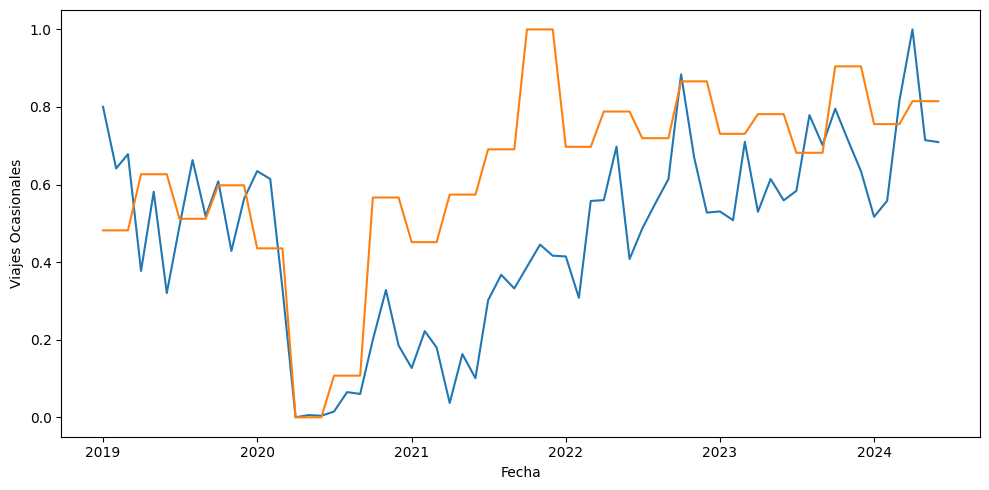

In [28]:
import matplotlib.pyplot as plt
import seaborn as  sns

from sklearn.preprocessing import MinMaxScaler

# Crear un scaler
scaler = MinMaxScaler()

# Seleccionar las columnas a normalizar (reemplaza 'columna1' y 'columna2' con los nombres reales)
df_agrupado[['Viajes Ocasionales', 'PIB Region Destino']] = scaler.fit_transform(df_agrupado[['Viajes Ocasionales', 'PIB Region Destino']])


fig, axis = plt.subplots(figsize = (10, 5))
ts = df_agrupado['Viajes Ocasionales']
sns.lineplot(data = ts)
ts = df_agrupado['PIB Region Destino']
sns.lineplot(data = ts)


plt.tight_layout()

plt.show()

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts, period = 12)
decomposition

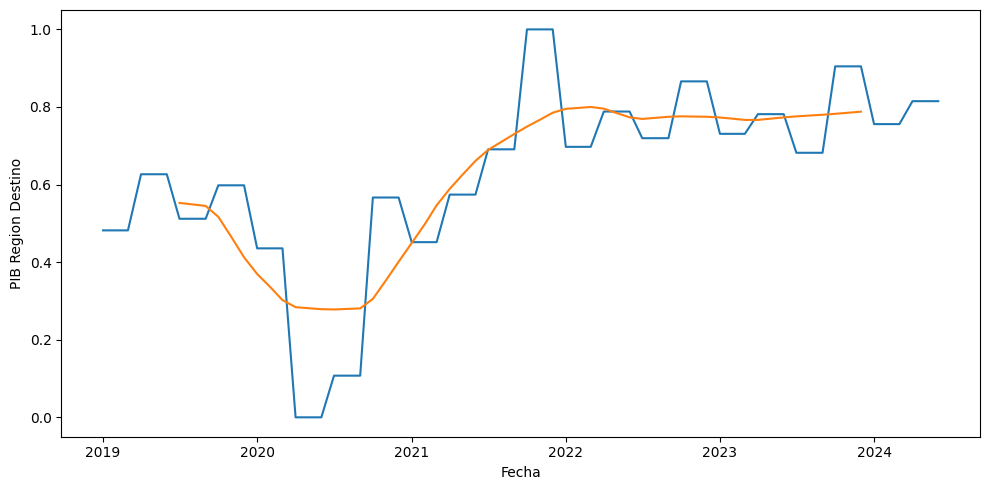

In [30]:
trend = decomposition.trend

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = trend)

plt.tight_layout()

plt.show()

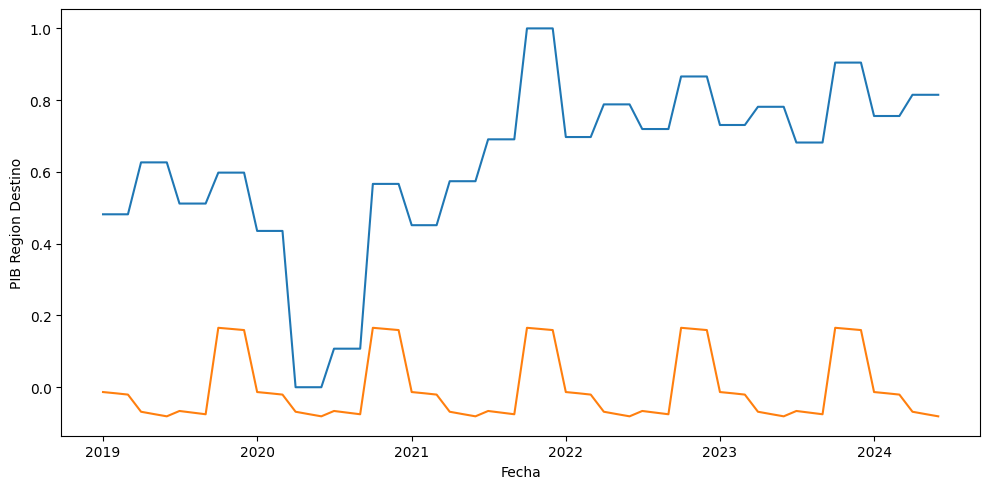

In [31]:
seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = seasonal)

plt.tight_layout()

plt.show()

In [32]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(ts)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                 -1.978179
p-value                         0.296222
#Lags Used                      0.000000
Number of Observations Used    65.000000
Critical Value (1%)            -3.535217
Critical Value (5%)            -2.907154
Critical Value (10%)           -2.591103
dtype: float64

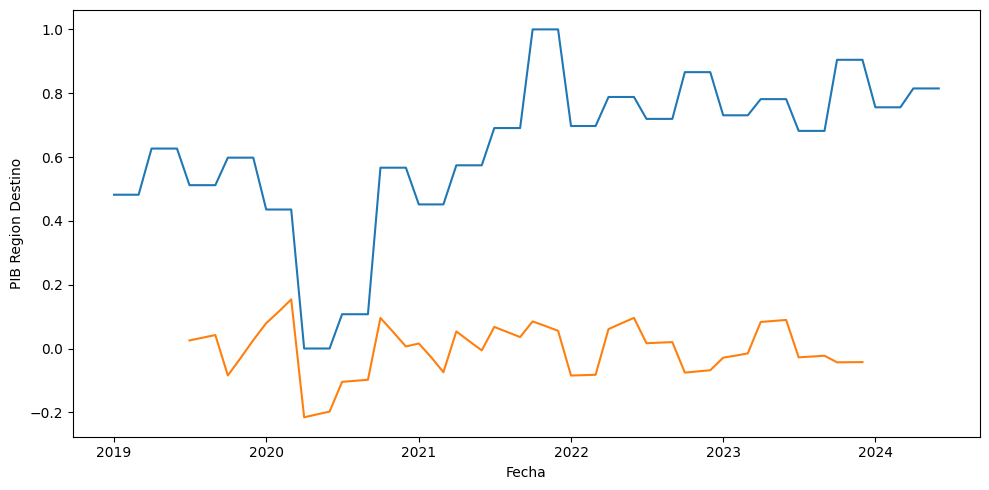

In [33]:
residual = decomposition.resid

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = residual)

plt.tight_layout()

plt.show()

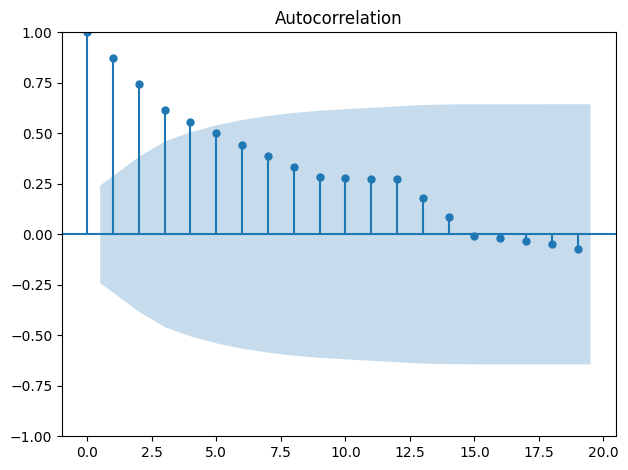

In [34]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(ts)

plt.tight_layout()

plt.show()

In [36]:
ts_stationary = ts.diff().dropna()

test_stationarity(ts_stationary)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                -7.890118e+00
p-value                        4.459760e-12
#Lags Used                     0.000000e+00
Number of Observations Used    6.400000e+01
Critical Value (1%)           -3.536928e+00
Critical Value (5%)           -2.907887e+00
Critical Value (10%)          -2.591493e+00
dtype: float64

In [1]:
from pmdarima import auto_arima

# Ajustar el modelo SARIMA
model = auto_arima(ts_stationary, 
                   seasonal=True,    # Para buscar un modelo estacional
                   trace=True,       # Para mostrar información del progreso
                   m=12)             # Periodo de estacionalidad (12 para datos mensuales con estacionalidad anual)

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject